<p align="center">
  <img src="Sentiment-On-Social-Media1.jpg" alt="Thank You" width="400"/>
</p>
 


# Goal of the Project: Social Media Trend and Sentiment Analysis
The goal is to analyze social media posts to understand trending topics and user sentiments across platforms like Twitter, Instagram, and LinkedIn. Using the sentimentsdataset.csv file, we will:

Identify popular hashtags to find trending topics.

Perform sentiment analysis on the text to classify emotions.

Study trends over time using timestamps.

Analyze user engagement through likes and retweets.

Explore how trends vary by platform and country.

This analysis helps businesses gain insights into public interest, market trends, and user behavior.

# Importing Libraries

In [279]:
# For data manipulation and numerical operation
import pandas as pd   
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

# For Data Visulization
import matplotlib.pyplot as plt   
import seaborn as sns 

#For Text Visualization
from wordcloud import WordCloud
import wordcloud


# For text processing
import re            
import string 
from collections import Counter

#Natural language processing
import nltk
from nltk.corpus import stopwords          
from nltk.tokenize import word_tokenize    
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Sentiment Analysis
from textblob import TextBlob 

#Date and Time handling
from datetime import datetime 

In [280]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Load the Dataset

In [319]:
# Load the dataset
df = pd.read_csv('sentimentdataset.csv')

In [320]:
# Displaying the first few rows to get an initial look at the data
df.head(200)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,198,"Boredom lingers, a stagnant pool of indiffere...",Boredom,2021-10-02 19:00:00,StagnantHeart,Facebook,#Boredom #Stagnation,7.0,15.0,Canada,2021,10,2,19
196,197,199,"Embarking on a journey of discovery, fueled b...",Curiosity,2023-04-15 10:15:00,InquisitiveMind,Twitter,#Curiosity #Learning,15.0,30.0,USA,2023,4,15,10
197,198,200,"Lost in the vast sea of information, an indif...",Indifference,2022-11-28 17:30:00,ApatheticObserver,Instagram,#Indifference #DigitalOverload,7.0,15.0,Canada,2022,11,28,17
198,199,201,The complex puzzle of life leaves me in a sta...,Confusion,2020-04-02 09:45:00,SeekingClarity,Facebook,#Confusion #LifePuzzle,10.0,20.0,UK,2020,4,2,9


# Checking Dataset Structure

In [321]:
# Checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


We check the structure of the dataset using `.info()`.  
It shows the column names, data types, and whether any values are missing.  
All 732 rows are complete, and there are 15 columns in total.

In [322]:
# printing the shape to see how many rows and columns I'm working with
print("Shape of the dataset:", df.shape)

Shape of the dataset: (732, 15)


# Removing Unwanted Columns

In [323]:
# Dropping redundant index columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Confirming changes
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']


We remove the two extra index columns that are not useful for analysis.  
This keeps the dataset clean and easier to work with.  
Now we have only the important columns left.

In [324]:
# Checking for duplicate rows

duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 20


In [325]:
# Removing duplicate rows 
df.drop_duplicates(inplace=True)

# Descriptive Summary

In [346]:
df.describe(include=[np.number])

,Retweets,Likes,Year,Month,Day,Hour,Weekday
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,21.542135,42.966292,2020.476124,6.108146,15.514045,15.592697,3.112360
std,7.124840,14.215995,2.828326,3.406099,8.444895,4.062778,2.033825
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,10.000000,13.000000,1.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000,3.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000,5.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000,6.000000


This shows basic statistics (like average, min, max) for numeric columns.  
Most posts are from recent years with a good number of likes and retweets.  
The average post gets about 21 retweets and 43 likes.


# VADER Sentiment Classification

In [326]:
# Initializing the VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER scores
def get_vader_sentiment(text):
    
    # Getting the sentiment score from VADER
    score = sia.polarity_scores(text)
    
    # Classifying sentiment based on the compound score
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying sentiment analysis to the 'Text' column
df['VADER_Sentiment'] = df['Text'].apply(get_vader_sentiment)

# Displaying the first few rows with classified sentiment
print(df[['Text', 'VADER_Sentiment']].head(25))

# Counting and displaying the distribution of sentiments
vader_sentiment_counts = df['VADER_Sentiment'].value_counts()
print("\nVADER Sentiment distribution:")
print(vader_sentiment_counts)


                                                 Text VADER_Sentiment
0    Enjoying a beautiful day at the park!        ...        Positive
1    Traffic was terrible this morning.           ...        Negative
2    Just finished an amazing workout! 💪          ...        Positive
3    Excited about the upcoming weekend getaway!  ...        Positive
4    Trying out a new recipe for dinner tonight.  ...         Neutral
5    Feeling grateful for the little things in lif...        Positive
6    Rainy days call for cozy blankets and hot coc...        Negative
7    The new movie release is a must-watch!       ...         Neutral
8    Political discussions heating up on the timel...         Neutral
9    Missing summer vibes and beach days.         ...        Negative
10   Just published a new blog post. Check it out!...         Neutral
11   Feeling a bit under the weather today.       ...        Positive
12   Exploring the city's hidden gems.            ...         Neutral
13   New year, new f

We used VADER sentiment analyzer to simplify the many different emotions (like joy, anger, etc.) into 3 main groups: Positive, Negative, and Neutral.  
This helps us clearly understand general public mood in a simple way.  
Most posts are Positive, followed by Negative and Neutral.


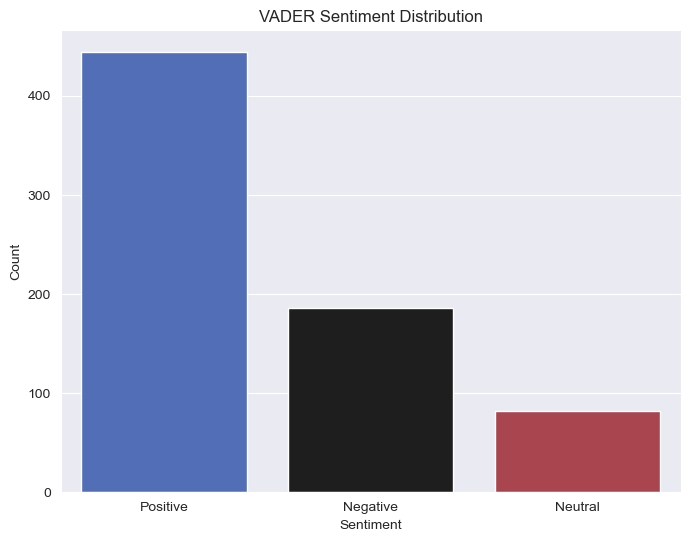

In [327]:
# Visualizing VADER sentiment distribution

plt.figure(figsize=(8,6))
sns.countplot(x='VADER_Sentiment', data=df, palette='icefire')
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Number of Posts per Platform

In [328]:
# Checking the number of posts per platform
print("\nPosts per platform:")
print(df['Platform'].value_counts())


Posts per platform:
Platform
 Instagram     252
 Facebook      224
 Twitter       122
 Twitter       114
Name: count, dtype: int64


We count how many posts came from each social media platform.  
After combining the duplicate Twitter entries, Instagram has the most posts (252),  
Twitter comes second (236), and Facebook is third (224).  
We may need to clean inconsistent entries for accurate analysis. 

# Cleaning Sentiment and Platform Columns

In [329]:
#Cleaning the 'Sentiment' and 'Platform' columns by removing extra spaces and standardizing text for consistent analysis.
df['Sentiment'] = df['Sentiment'].str.strip()
df = df[df['Sentiment'] != '']

In [330]:
df['Platform'] = df['Platform'].str.strip().str.title()

# Confirming cleanup
print("Unique platforms after cleaning:", df['Platform'].unique())

Unique platforms after cleaning: ['Twitter' 'Instagram' 'Facebook']


We removed extra spaces and made all platform names consistent (e.g., 'twitter' → 'Twitter').  
Now, only valid and clean sentiment and platform values remain for analysis.  
This ensures accurate grouping and comparison across platforms.


# Pie Chart – Distribution of Posts Per Platform

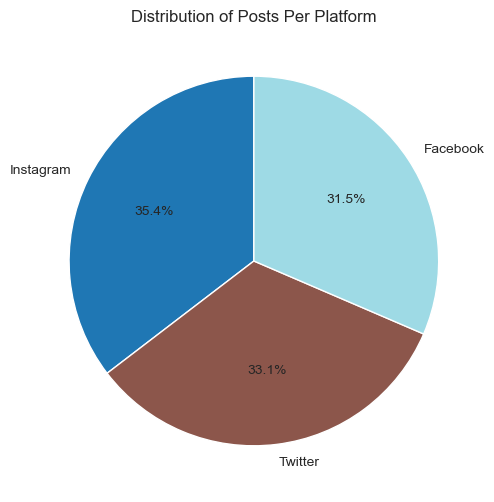

In [331]:
# Creating a pie chart for the number of posts per platform
plt.figure(figsize=(6, 6))  
platform_counts = df['Platform'].value_counts()

# Plotting the pie chart
platform_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title("Distribution of Posts Per Platform")  
plt.ylabel('') 
plt.show()

Analysis & Insight:

This pie chart visualizes how posts are distributed among different platforms:

    a.  Instagram remains the top platform in terms of volume.

    b. Twitter, after combining duplicates, comes second.
    
    c. Facebook has the fewest posts among the three, though still close to Twitter.

    d.  The chart helps us understand where users are most active in terms of posting content, which is valuable for targeting platform-specific campaigns or analyses.

# Sentiment Distribution Across Platforms

In [349]:
# Counting sentiment distribution by platform
sentiment_by_platform = df.groupby(['Platform', 'VADER_Sentiment']).size().unstack(fill_value=0)
print(sentiment_by_platform)

VADER_Sentiment  Negative  Neutral  Positive
Platform                                    
Facebook               57       22       145
Instagram              62       31       159
Twitter                67       29       140


We grouped the data by Platform and VADER_Sentiment to count the sentiment distribution for each platform.
The sentiment counts are displayed for Facebook, Instagram, and Twitter, showing the breakdown of Negative, Neutral, and Positive sentiments.
This helps us understand the sentiment trends across different social media platforms.

# Visualizing  Sentiment Distribution by Platform

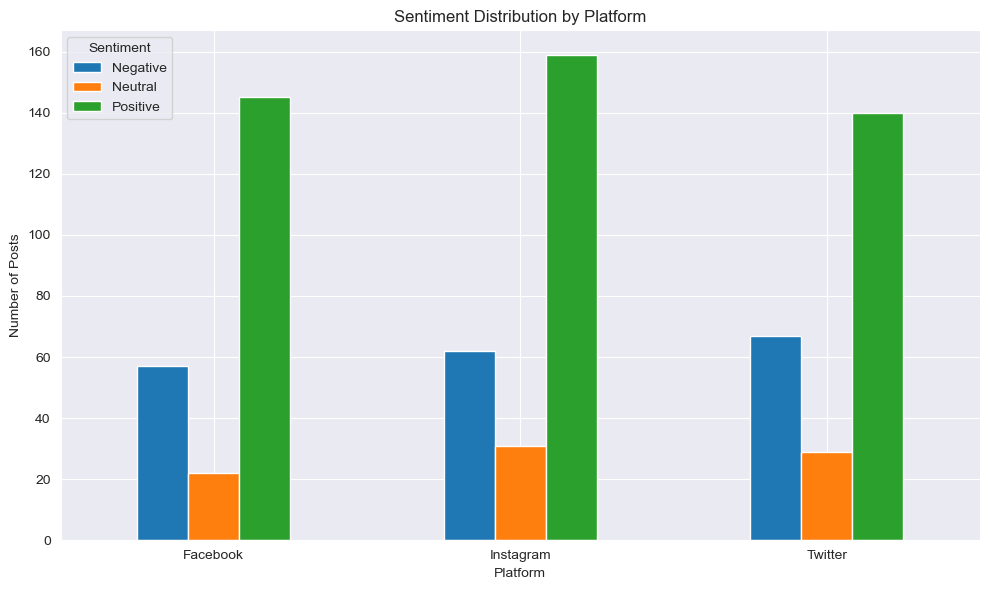

In [356]:
# Plotting the bar chart
sentiment_by_platform.plot(kind='bar', figsize=(10, 6))

plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We created a bar chart to visualize the sentiment distribution by platform.
The chart displays the number of posts with different sentiments (Negative, Neutral, Positive) for each platform.
This provides a clear visual comparison of sentiment trends across Facebook, Instagram, and Twitter.

# Extracting the Top 10 Most Common Hashtags

In [332]:
# Extracting the top 10 most common hashtags from the dataset
hashtags = df['Hashtags'].apply(lambda x: re.findall(r'\#\w+', x)).explode()
hashtag_counts = Counter(hashtags)
top_10_hashtags = hashtag_counts.most_common(10)
top_10_hashtags_df = pd.DataFrame(top_10_hashtags, columns=['Hashtag', 'Count'])
top_10_hashtags_df

,Hashtag,Count
0,#Serenity,15
1,#Excitement,13
2,#Gratitude,12
3,#Despair,11
4,#Nostalgia,11
5,#Curiosity,10
6,#Awe,9
7,#Contentment,9
8,#Grief,9
9,#Enthusiasm,8


We extracted hashtags from the 'Hashtags' column using regular expressions.
The top 10 most common hashtags were identified by counting their occurrences.
This allows us to see which hashtags are most frequently used in the dataset.

# Visualizing the top hastags

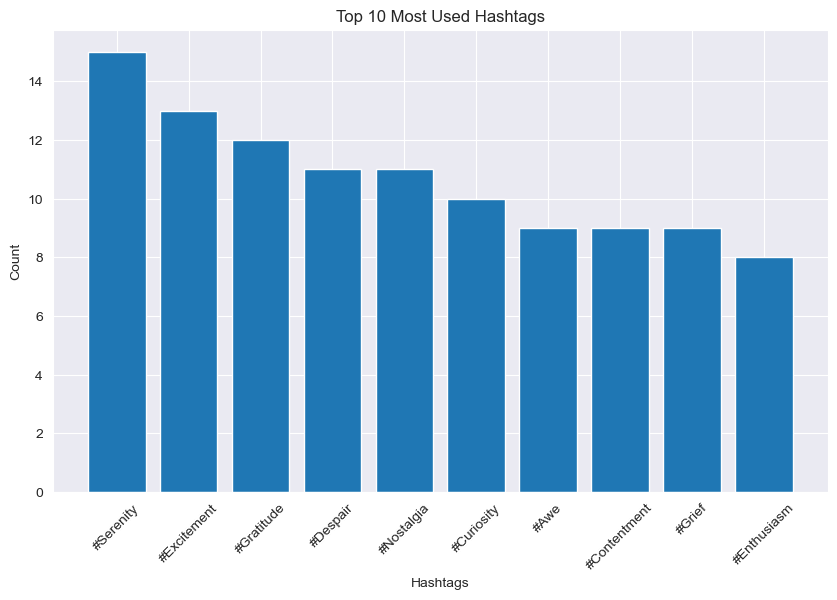

In [333]:
# Plotting the top 10 hashtags
plt.figure(figsize=(10,6))
plt.bar(top_10_hashtags_df['Hashtag'], top_10_hashtags_df['Count'])
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Most Used Hashtags')
plt.xticks(rotation=45)
plt.show()

We created a bar chart to visualize the top 10 most used hashtags in the dataset.
The chart shows the frequency of each hashtag, helping to identify the most popular ones.
This provides a clear visual comparison of hashtag usage across the dataset.

# Converting Timestamp and Extracting Time Related Features

In [334]:
#Converting the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

#Extracting time-related features (e.g., year, month, day, hour)
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.weekday

We converted the 'Timestamp' column to datetime format for better manipulation.
Then, we extracted year, month, day, hour, and weekday as separate time-related features.
These new features allow us to perform time-based analysis on the dataset.

# Visualizing the Number of Posts Per Month

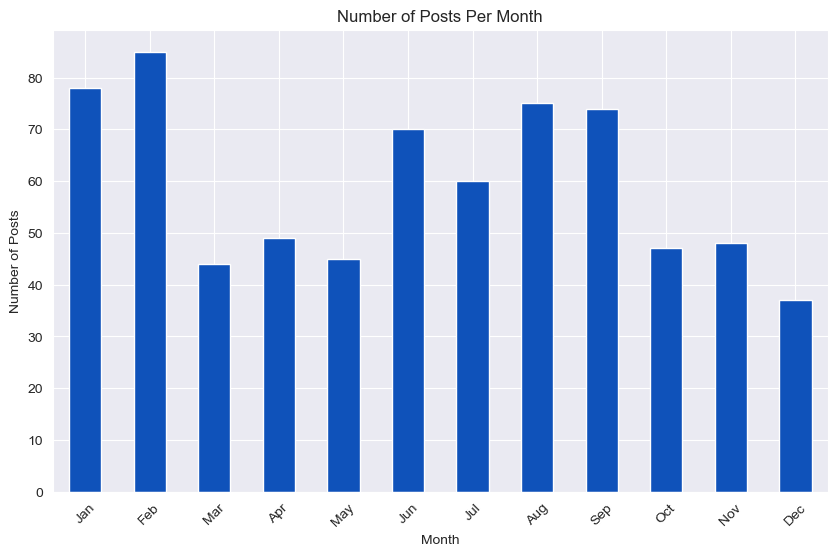

In [335]:
# Plotting the number of posts per month
plt.figure(figsize=(10,6))
df.groupby('Month').size().sort_index().plot(kind='bar', color='#0F52BA')
plt.title("Number of Posts Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


We plotted a bar chart showing the number of posts per month based on the extracted Month feature.
The chart provides a clear view of how posts are distributed across the months .

# Visualizing  for Posts by Year Grouped by Platform

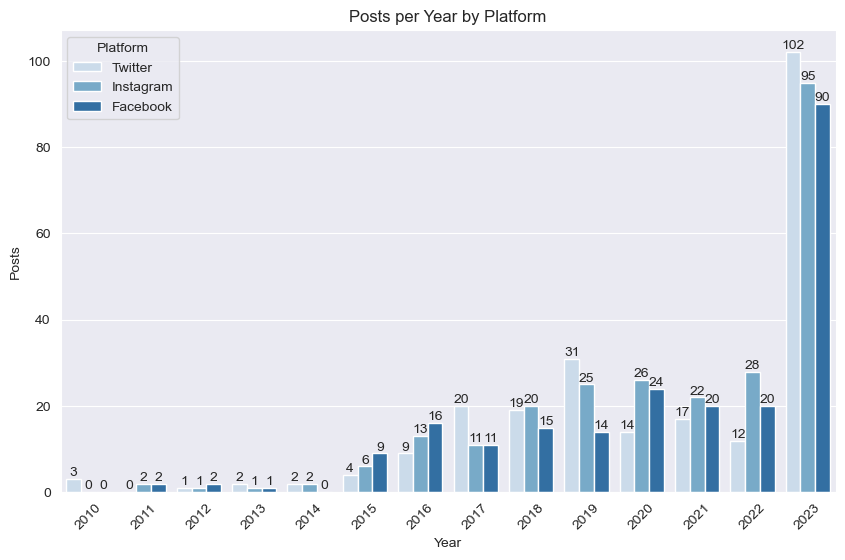

In [336]:
#creating a count plot for posts by year grouped by platform
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Year', hue='Platform', data=df,palette = 'Blues')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Posts per Year by Platform')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.xticks(rotation=45)
plt.show()

# Visualizing posts vs year

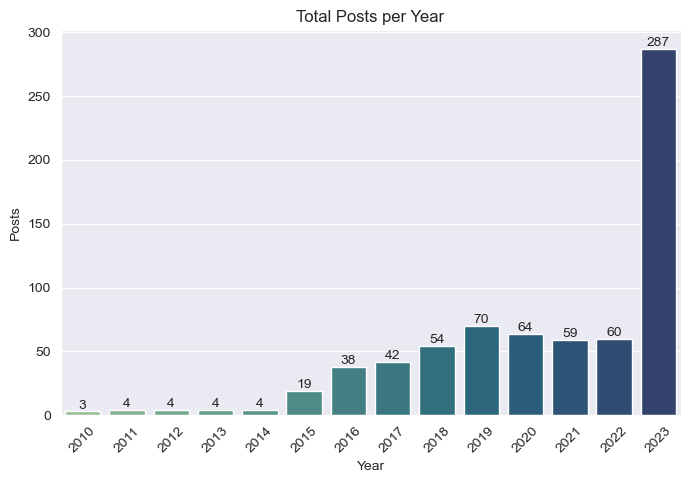

In [337]:
#creating a countplot for the totalpost by year
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Year', data=df,palette ='crest')
ax.bar_label(ax.containers[0])
plt.title('Total Posts per Year')
plt.xlabel('Year')
plt.ylabel('Posts')
plt.xticks(rotation=45)
plt.show()

We created a count plot to visualize the total number of posts per year.
The chart displays the overall trend of posts over the years, with the bar labels showing the exact number of posts for each year.
This helps to understand how the total post count changes annually.

# Extracting the Top 10 Most Liked Posts

In [338]:
# Top 10 most liked posts
top_liked = df.sort_values(by='Likes', ascending=False).head(10)
top_liked[['Text', 'Likes', 'User', 'Platform']]

,Text,Likes,User,Platform
570,"Underneath the city lights, the dancer express...",80.0,DanceEnthusiastCityNightPerformance,Twitter
402,Awe-inspired by the vastness of the cosmos on ...,80.0,CosmosExplorer,Instagram
550,"After a series of defeats, the soccer team fac...",80.0,SoccerFanTeamDefeats,Twitter
540,Celebrating a historic victory in the World Cu...,80.0,FootballFanWorldCupCelebration,Instagram
560,"In the serene beauty of a sunset, nature unfol...",80.0,NatureEnthusiastSunsetWonder,Instagram
355,Anticipation for an upcoming adventure in an e...,80.0,Wanderlust,Twitter
530,"Captivated by the spellbinding plot twists, th...",80.0,MovieEnthusiastPremiereAttendee,Twitter
470,"Dancing on sunshine, each step a celebration o...",80.0,SunshineDancer,Instagram
432,"Heartache deepens, a solitary journey through ...",80.0,SolitaryDescent,Instagram
345,Motivated to achieve fitness goals after an in...,80.0,FitnessJunkie,Facebook


# Extracting the Top 10 Most Reweeted Posts

In [339]:
# Top 10 most retweeted posts
top_retweeted = df.sort_values(by='Retweets', ascending=False).head(10)
top_retweeted[['Text', 'Retweets', 'User', 'Platform']]

,Text,Retweets,User,Platform
530,"Captivated by the spellbinding plot twists, th...",40.0,MovieEnthusiastPremiereAttendee,Twitter
368,Elation over discovering a rare book in a quai...,40.0,Bookworm,Instagram
550,"After a series of defeats, the soccer team fac...",40.0,SoccerFanTeamDefeats,Twitter
345,Motivated to achieve fitness goals after an in...,40.0,FitnessJunkie,Facebook
520,"At a Justin Bieber concert, the infectious bea...",40.0,BieberDanceEnthusiast,Instagram
560,"In the serene beauty of a sunset, nature unfol...",40.0,NatureEnthusiastSunsetWonder,Instagram
570,"Underneath the city lights, the dancer express...",40.0,DanceEnthusiastCityNightPerformance,Twitter
510,"At the front row of Adele's concert, each note...",40.0,AdeleConcertGoer,Instagram
402,Awe-inspired by the vastness of the cosmos on ...,40.0,CosmosExplorer,Instagram
540,Celebrating a historic victory in the World Cu...,40.0,FootballFanWorldCupCelebration,Instagram


# Grouping Data by Platform and Summing Likes

In [340]:
#Grouping the data by platform, adding up the likes, and sorting to see which platform got the most likes
df['Likes'] = df['Likes'].astype(int)

df_aggregated = df.groupby('Platform')['Likes'].mean().reset_index()

df_likes = df.groupby('Platform')['Likes'].sum().reset_index()


# Visual Representation of likes by Platform

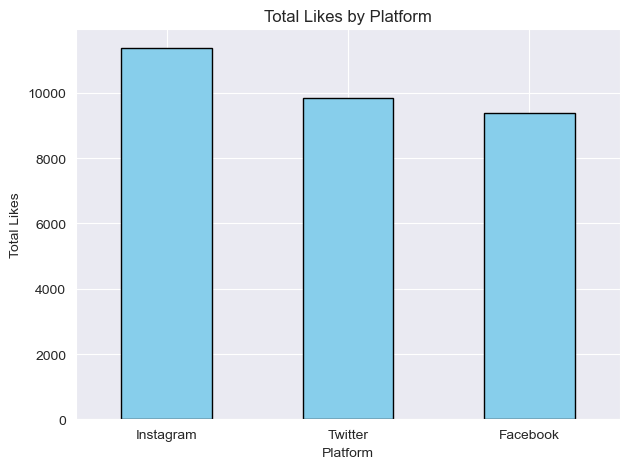

In [341]:
# Grouping and summing likes by platform
likes_by_platform = df.groupby("Platform")["Likes"].sum().sort_values(ascending=False)

# Plotting
likes_by_platform.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Likes by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Likes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualizing Engagement of top 10 countries in Social Media

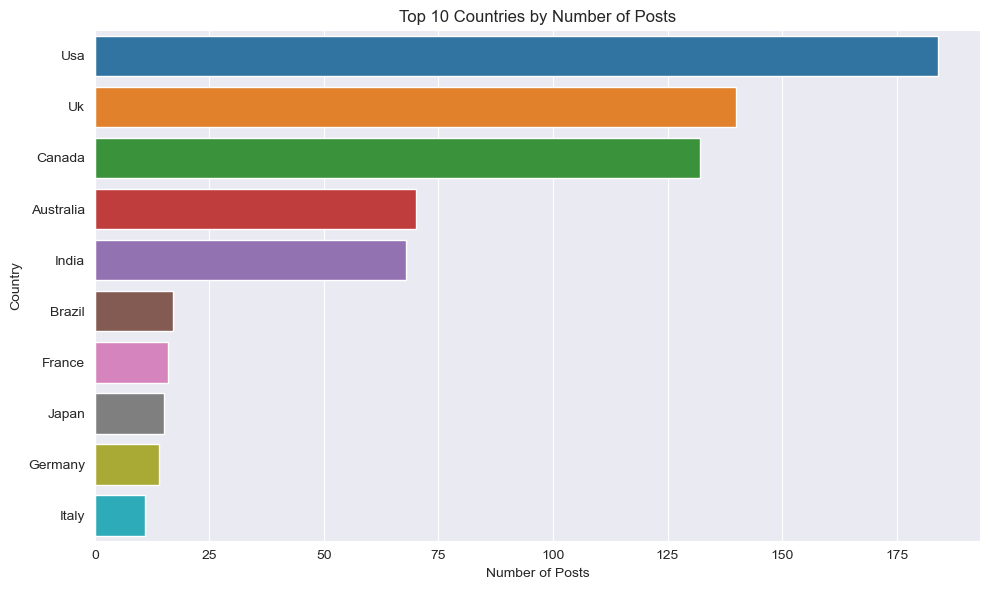

In [342]:
# Cleaning the 'Country' column to remove inconsistencies
df['Country'] = df['Country'].str.strip().str.title()

# Analyzing the top 10 most active countries
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Grouping Sentiment by Country

In [357]:
# Grouping sentiment by country
sentiment_by_country = df.groupby(['Country', 'VADER_Sentiment']).size().unstack(fill_value=0)

# Displaying sentiment distribution by country
print(sentiment_by_country)

VADER_Sentiment  Negative  Neutral  Positive
Country                                     
Australia              24        4        42
Austria                 0        0         1
Belgium                 0        1         1
Brazil                  6        1        10
Cambodia                1        0         0
Canada                 38       17        77
China                   0        0         1
Colombia                0        0         1
Czech Republic          0        0         2
Denmark                 0        0         2
France                  4        4         8
Germany                 6        1         7
Greece                  3        1         1
India                  24        5        39
Ireland                 1        0         0
Italy                   1        0        10
Jamaica                 0        1         0
Japan                   1        1        13
Jordan                  0        0         1
Kenya                   0        0         1
Maldives  

We counted how many positive, neutral, and negative posts came from each country.
This shows which countries had more positive or negative feelings in their posts.
Countries like the USA, UK, and Canada had the most posts, and most of them were positive

# Visual Representation of Sentiment by Country

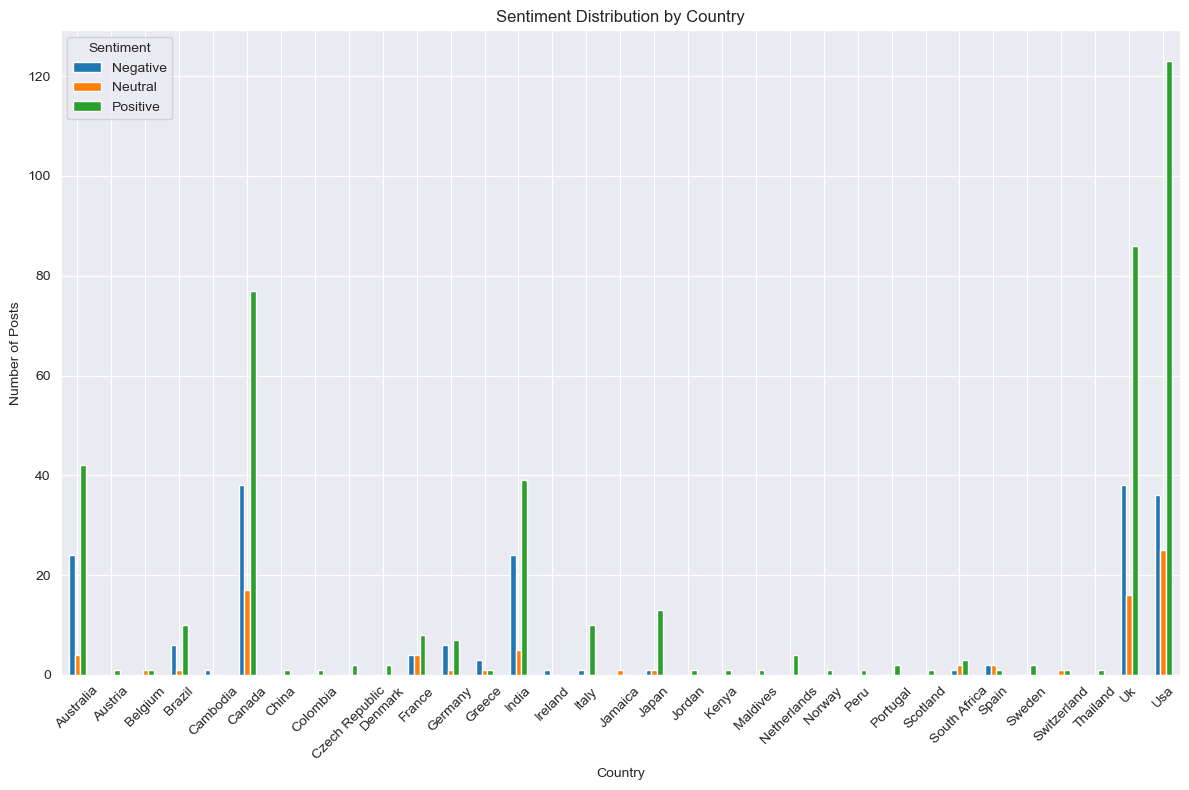

In [359]:
# Plotting the bar chart
sentiment_by_country.plot(kind='bar', figsize=(12, 8))

# Adding chart title and labels
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Between Numeric Columns

In [347]:
# Selecting numeric columns only
numeric_df = df.select_dtypes(include='number')

# Computing correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

          Retweets     Likes      Year     Month       Day      Hour   Weekday
Retweets  1.000000  0.998475 -0.035511  0.081559  0.010345  0.196162  0.053444
Likes     0.998475  1.000000 -0.038813  0.074696  0.012598  0.194503  0.053641
Year     -0.035511 -0.038813  1.000000 -0.318224  0.031665 -0.088485 -0.049901
Month     0.081559  0.074696 -0.318224  1.000000 -0.153564  0.137145 -0.029166
Day       0.010345  0.012598  0.031665 -0.153564  1.000000  0.040422 -0.063474
Hour      0.196162  0.194503 -0.088485  0.137145  0.040422  1.000000 -0.002284
Weekday   0.053444  0.053641 -0.049901 -0.029166 -0.063474 -0.002284  1.000000


We selected only the numeric columns and calculated how they are related to each other.
We found that Likes and Retweets have a very strong positive relationship, when one increases, the other usually does too.
Other columns like Hour, Month, or Day do not show strong connections with Likes or Retweets.

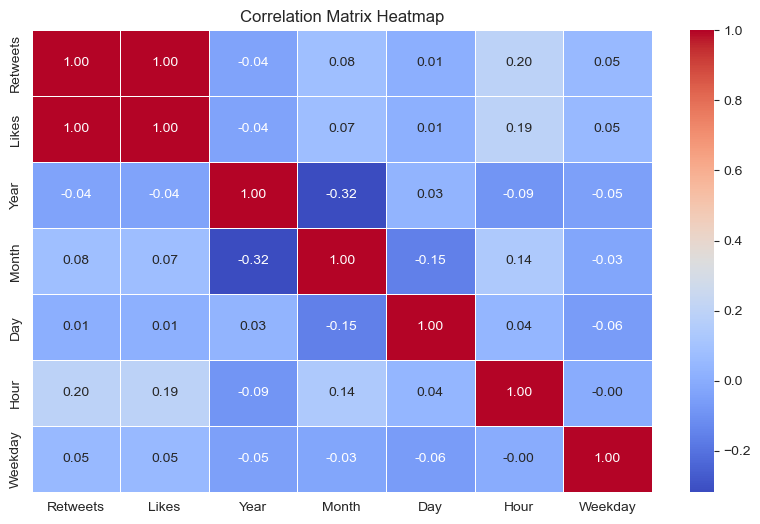

In [348]:
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Top 10 Most Engaged Users

In [366]:
user_stats = df.groupby('User').agg({
    'Text': 'count',
    'Likes': 'sum',
    'Retweets': 'sum'
}).reset_index().rename(columns={'Text': 'Post_Count'})

# Sorting by Likes Desc
user_stats_sorted = user_stats.sort_values(by='Likes', ascending=False)

# Displaying top 10 engaged users
print(user_stats_sorted.head(10))

                   User  Post_Count  Likes  Retweets
124    CosmosExplorer             2    160      80.0
134   CulinaryExplorer            2    140      70.0
395    MusicHarmonist             2    140      70.0
180     EchoedLaughter            2    130      65.0
268    GrowthSeeker               2    120      60.0
670    WinterWarmth               2    110      55.0
234    ForestDreamer              2    110      56.0
144    DanceEnthusiast            2    110      56.0
648    VacationDreamer            2    105      52.0
574   SpringEnthusiast            2    100      50.0


We grouped the data by User and calculated the total number of posts, likes, and retweets each user received.
Then, we sorted users by total likes to identify the top 10 most engaged users.
These users consistently received high engagement across their posts, these users got most attention.

# Visual Representation of top 10 users according to their engagement on Social Media

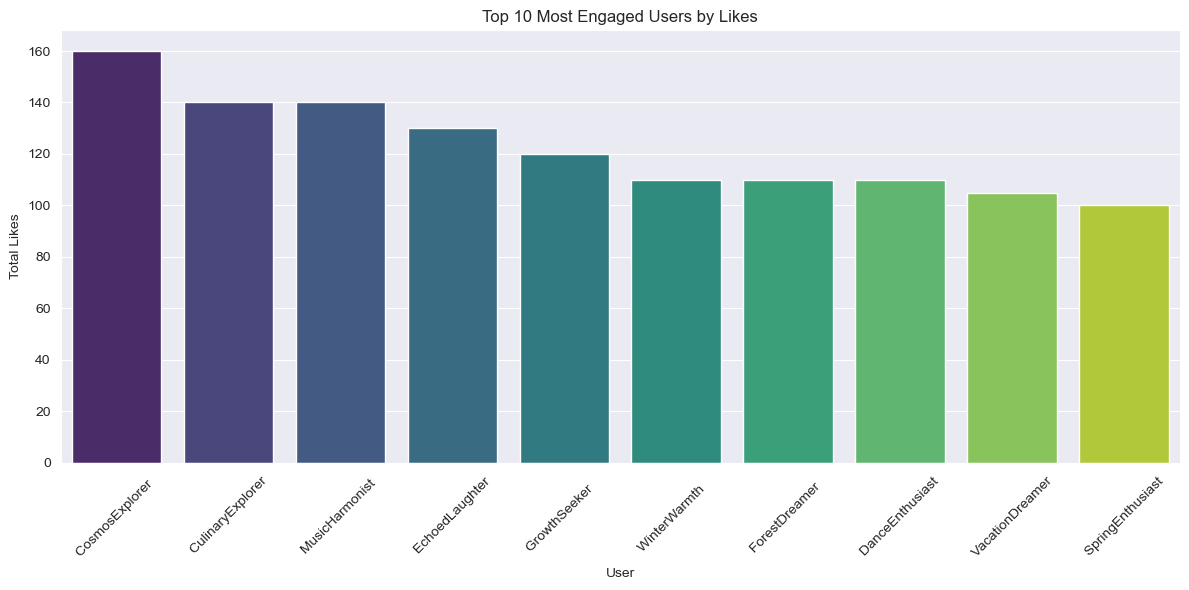

In [367]:
# Selecting top 10 users by Likes
top_users = user_stats_sorted.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_users, x='User', y='Likes', palette='viridis')

plt.title('Top 10 Most Engaged Users by Likes')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly Sentiment Trends of each Platform

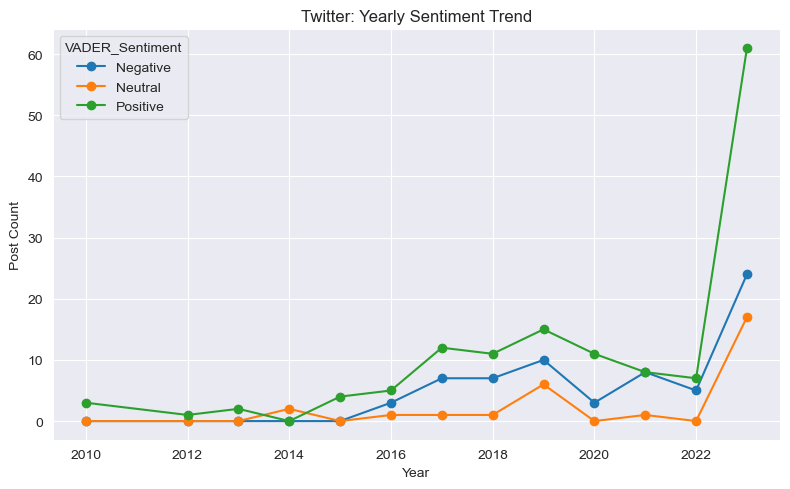

In [372]:
twitter = df[df['Platform'] == 'Twitter']
tw = twitter.groupby(['Year', 'VADER_Sentiment']).size().unstack().fillna(0)
tw.plot(marker='o', figsize=(8,5), title='Twitter: Yearly Sentiment Trend')
plt.ylabel('Post Count')
plt.grid(True)
plt.tight_layout()
plt.show()


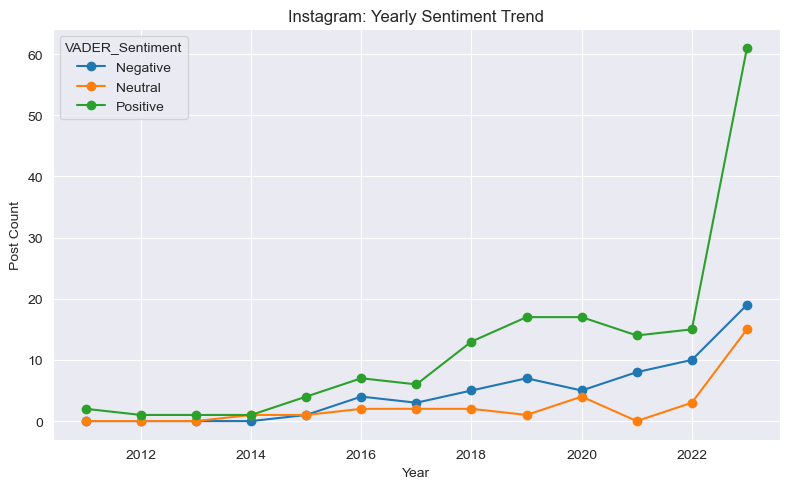

In [373]:
instagram = df[df['Platform'] == 'Instagram']
ig = instagram.groupby(['Year', 'VADER_Sentiment']).size().unstack().fillna(0)
ig.plot(marker='o', figsize=(8,5), title='Instagram: Yearly Sentiment Trend')
plt.ylabel('Post Count')
plt.grid(True)
plt.tight_layout()
plt.show()


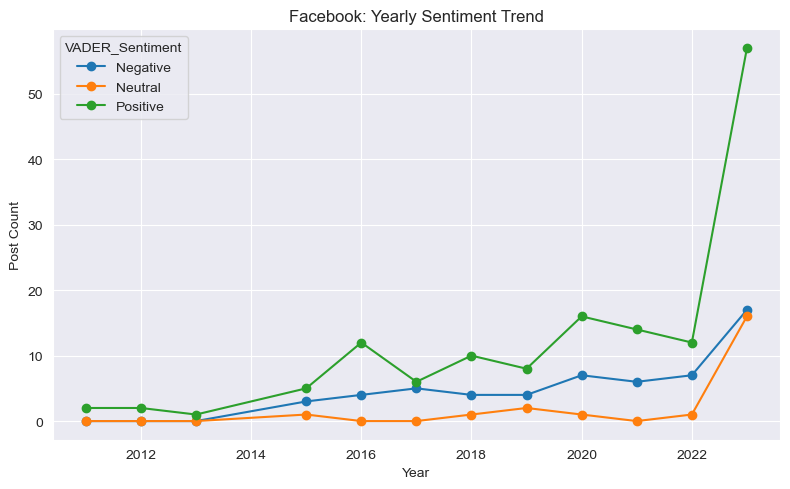

In [374]:
facebook = df[df['Platform'] == 'Facebook']
fb = facebook.groupby(['Year', 'VADER_Sentiment']).size().unstack().fillna(0)
fb.plot(marker='o', figsize=(8,5), title='Facebook: Yearly Sentiment Trend')
plt.ylabel('Post Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# WordCloud of Most Used Words

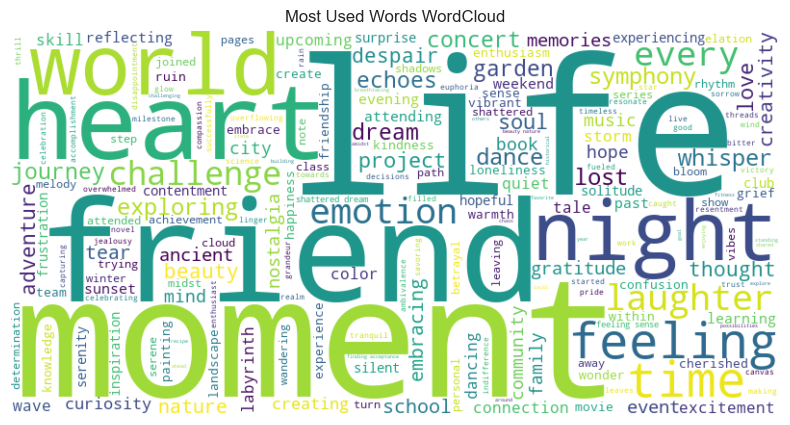

In [375]:
# Combining all text and cleaned it
all_text = ' '.join(df['Text']).lower()
clean_text = re.sub(r'[^a-zA-Z\s]', '', all_text)

# Generating word list using TextBlob
words = TextBlob(clean_text).words
filtered_words = ' '.join([word for word in words if len(word) > 3])

# Generating and plotting word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words WordCloud')
plt.show()

We combined all the post text, cleaned it by removing special characters, and filtered out short words.
Then, using the cleaned text, we created a WordCloud to visually show the most frequently used words in the posts.
The bigger the word, the more often it appeared.

<p align="center">
  <img src="-thank-you.jpg" alt="Thank You" width="300"/>
</p>
